# Part II - FordGoBike Trip Explanatory Analysis
## by Ntebogang Eric Makwati

## Investigation Overview

The majority of users were males of the Subscribers user type. As the age of members increases, there is a significant reduction in the frequency of trips, with a denser concentration of trips observed around the ages of 18 and 55 years. Males tend to take more trips than males.

The peak hours for trips occur between 7am and 9am , and 1600hrs and 1800hrs, which may be linked to the typical end-of-day work hours for individuals.


## Dataset Overview and Executive Summary

This document delves into the FordGoBike trip data for the San Francisco Bay area, sourced from System data. With a focus on trip details, user information, bike station data, geographical coordinates, and temporal patterns, this dataset offers a comprehensive view of biking dynamics in the region. Each record represents an individual ride, encompassing 16 features, including member age, gender, ride start/end times, start/end station coordinates, and more. The majority of riders fall between the ages of 18 and 41, although some records indicate riders over 80 or even 100 years old. To facilitate analysis, new fields were derived from existing features, such as Member Age, Start day, End day, Start hr, End hr, and Start Year.

Key insghts:
The analysis reveals a higher proportion of males and other subscriber-type users. A noteworthy trend indicates a decrease in trip frequency as member age increases, with a concentration of trips around ages 18 and 55. Males generally take more trips than females. Additionally, peak trip hours fall between 7am and 9am , and 1600hrs and 1800hrs, potentially aligning with typical end-of-day work hours.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

Bikedata_cleaned = pd.read_csv('Bikedata_cleaned.csv')

Bikedata_cleaned.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,End_month,Start_year,End_year,Start_hr,End_hr,user_age,day_of_week,duration_min,Start_hour,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,March,2019,2019,17,8,35,Thursday,869.750000,17,35
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,March,2019,2019,12,5,47,Thursday,1030.900000,12,47
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,March,2019,2019,17,4,30,Thursday,608.166667,17,30
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,March,2019,2019,23,0,45,Thursday,26.416667,23,45
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,March,2019,2019,23,0,60,Thursday,29.883333,23,60


**Daily Ride Frequency:**
   - What is the distribution of ride frequency throughout the days of the week?

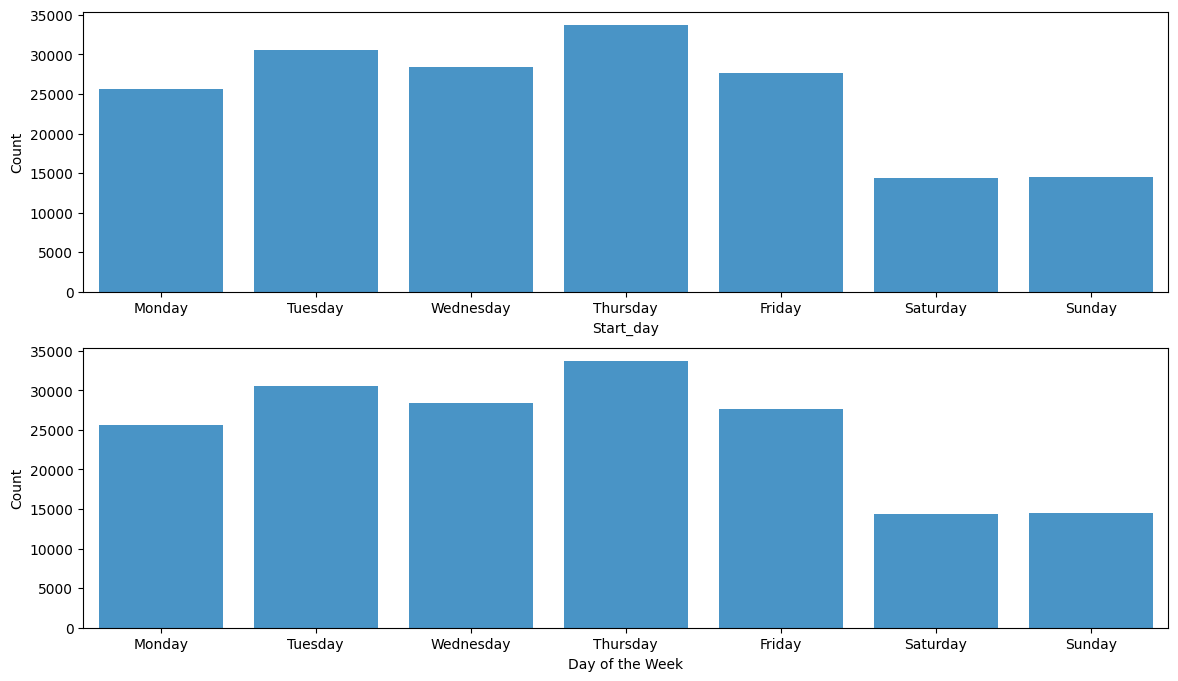

In [3]:
# ride frequency per Start and End days

fig, ax = plt.subplots(2, 1, figsize=[14, 8])

day_columns = ['Start_day', 'End_day']

for i, column in enumerate(day_columns):
    sns.countplot(data=Bikedata_cleaned, x=column, color='#3498db', ax=ax[i], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    ax[i].set_ylabel('Count')

ax[1].set_xlabel('Day of the Week')

plt.show()

Thursdays and Tuesdays saw the highest ride frequency, while weekends exhibited the lowest number of recorded trips.

 **Hourly Ride Frequency:**
   - How does ride frequency vary throughout the 24-hour day, and are there specific peak hours?

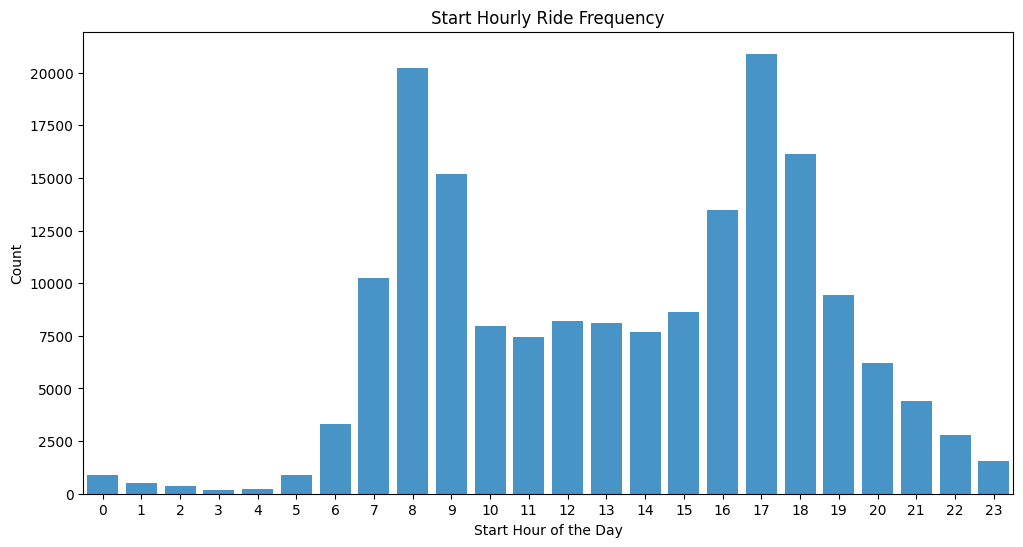

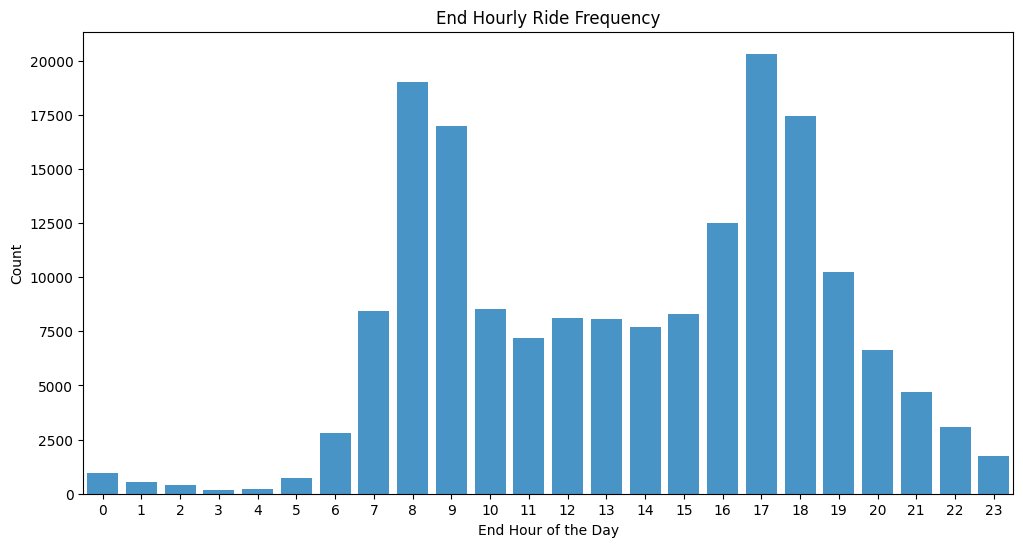

In [4]:
def create_count_plot(data, column, title, xlabel):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=column, color='#3498db')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.show()

# Create count plot for start hours
create_count_plot(Bikedata_cleaned, 'Start_hr', 'Start Hourly Ride Frequency', 'Start Hour of the Day')

# Create count plot for end hours
create_count_plot(Bikedata_cleaned, 'End_hr', 'End Hourly Ride Frequency', 'End Hour of the Day')

Trips peak between 7am and 9am in the morning and 1600hrs and 1800hrs in the afternoon, likely correlated with the typical conclusion of the workday for individuals.

#### What is the ride duration by days per gender ?

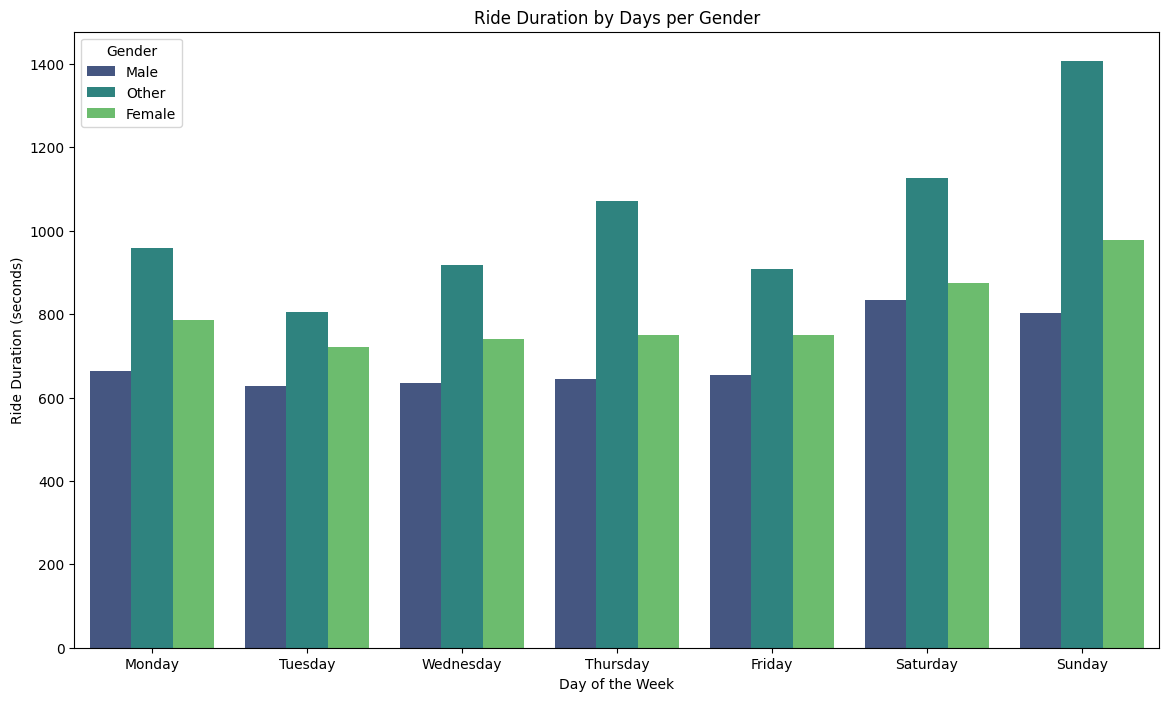

In [7]:
# Define the order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a clustered bar chart with ordered Start_day
plt.figure(figsize=(14, 8))
sns.barplot(x='Start_day', y='duration_sec', hue='member_gender', data=Bikedata_cleaned, errorbar=None, palette='viridis', order=day_order)
plt.title('Ride Duration by Days per Gender')
plt.xlabel('Day of the Week')
plt.ylabel('Ride Duration (seconds)')
plt.legend(title='Gender')
plt.show()


Females tend to have a high trips duration than males. The Gender depicted as 'Other' has a higher duration than both males and females. Saturday and Sunday show that Males and Females are having a high number in trips.

#### What is the distribution of user ages?

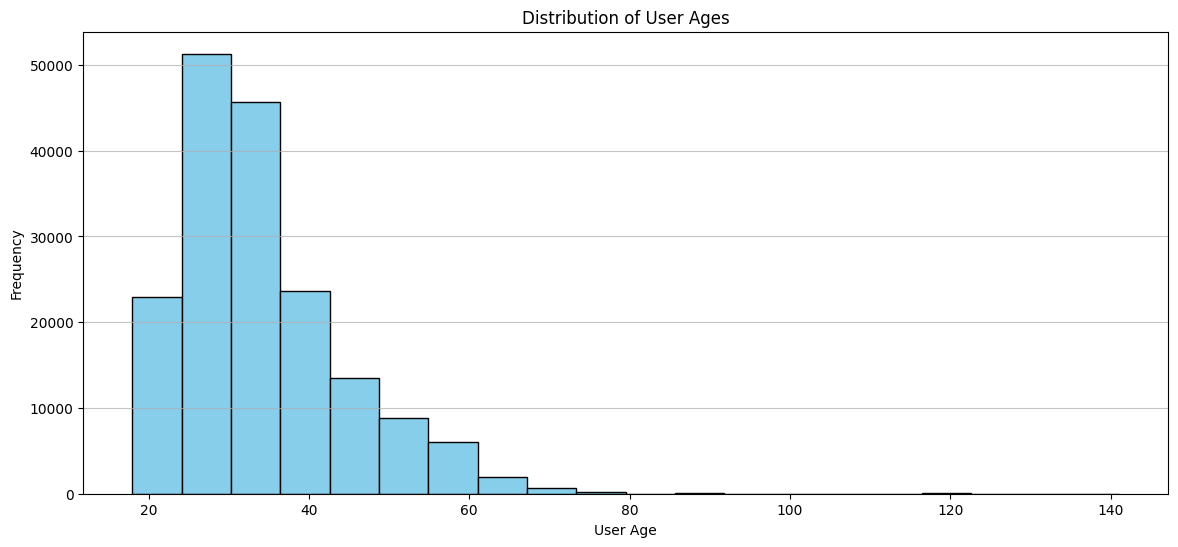

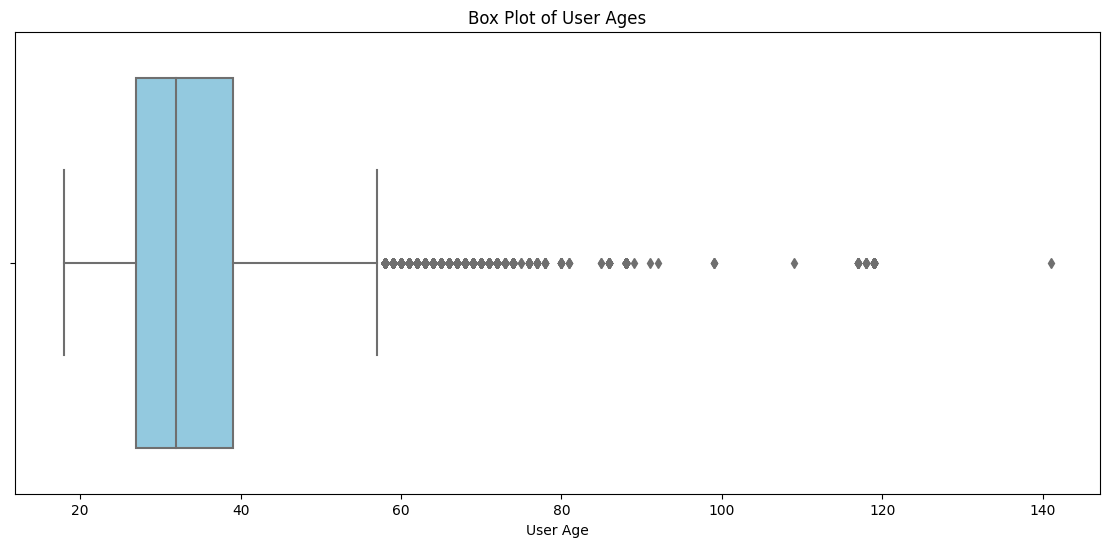

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: user_age, dtype: float64


In [8]:
# Calculate user ages based on the birth year
current_year = 2019 
Bikedata_cleaned['user_age'] = current_year - Bikedata_cleaned['member_birth_year']

# Remove rows with missing or zero birth years
Bikedata_cleaned = Bikedata_cleaned[Bikedata_cleaned['user_age'] > 0]

# Plot the histogram
plt.figure(figsize=(14, 6))
plt.hist(Bikedata_cleaned['user_age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of User Ages')
plt.xlabel('User Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Plot the box plot
plt.figure(figsize=(14, 6))
sns.boxplot(x=Bikedata_cleaned['user_age'], color='skyblue')
plt.title('Box Plot of User Ages')
plt.xlabel('User Age')
plt.show()

# Calculate summary statistics
age_summary = Bikedata_cleaned['user_age'].describe()
print(age_summary)

From the daily frequency analysis, Tuesday and Thursday shows to be significant days with bike rides. The time between 8am and 1800hrs are depicted to be peak hours from the hourly count plot analysis. More frequency also depicted on weekdays than on weekends.From the analysis in the above plots, it shows that most users in this dataset are shown to be ages between 18 and 42yrs.

#### How do usage patterns change over different times for different user types?

Text(0, 0.5, 'Number of Trips')

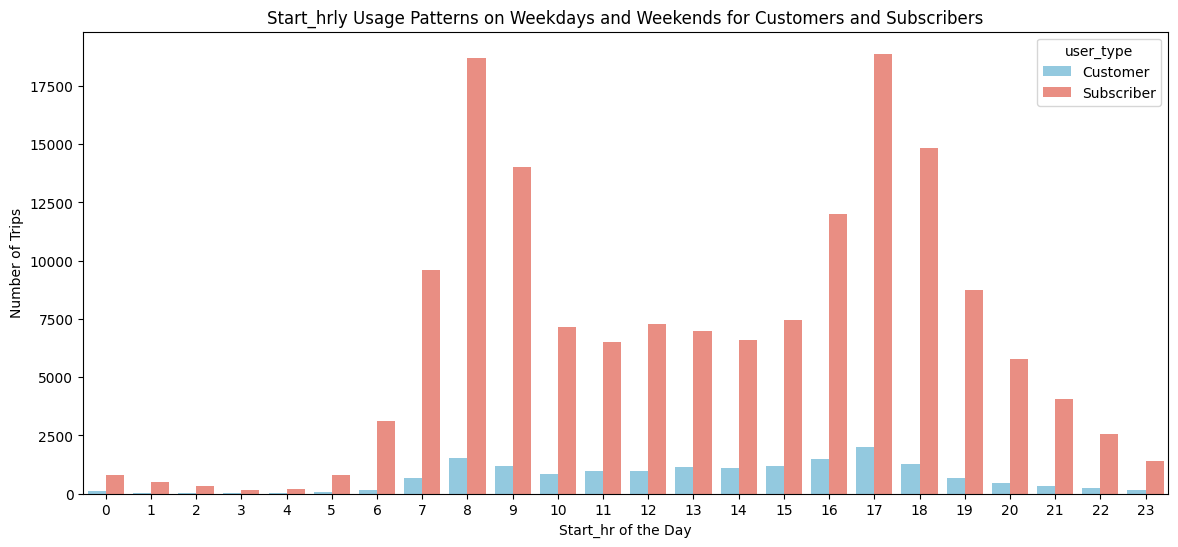

In [10]:
# Create separate DataFrames for customers and subscribers
customers_Bikedata_cleaned = Bikedata_cleaned[Bikedata_cleaned['user_type'] == 'Customer']
subscribers_Bikedata_cleaned = Bikedata_cleaned[Bikedata_cleaned['user_type'] == 'Subscriber']

# Analyze the variation in usage patterns between weekdays and weekends
#Bikedata_cleaned['day_of_week'] = Bikedata_cleaned['start_time'].dt.day_name()

plt.figure(figsize=(14, 6))
sns.countplot(x='Start_hr', hue='user_type', data=Bikedata_cleaned, hue_order=['Customer', 'Subscriber'], palette=['skyblue', 'salmon'])
plt.title('Start_hrly Usage Patterns on Weekdays and Weekends for Customers and Subscribers')
plt.xlabel('Start_hr of the Day')
plt.ylabel('Number of Trips')

During the time frame of 7 am to 9 am, there is a notable surge in the number of trips for Subscribers. In the afternoon, specifically between 4:00 pm and 6:00 pm, another peak in trip activity is observed. Customers, while adhering to peak hours, exhibit relatively lower trip counts during these periods.

#### How do usage patterns vary over different times considering user type and gender?

In [ ]:
# Extract the hour from 'start_time'
Bikedata_cleaned['Start_hour'] = Bikedata_cleaned['start_time'].dt.hour

# Create a DataFrame with counts of trips based on user type, gender, and hour
usage_patterns = Bikedata_cleaned.groupby(['Start_hour', 'user_type', 'member_gender']).size().reset_index(name='Trip_Count')

# Create a FacetGrid with user_type and member_gender as facets
g = sns.FacetGrid(usage_patterns, col="user_type", row="member_gender", margin_titles=True, height=4, aspect=1.5)
g.map(sns.lineplot, "Start_hour", "Trip_Count", marker="o", errorbar=None)
g.set_axis_labels("Start Hour", "Number of Trips")
g.set_titles(col_template="{col_name} User Type", row_template="{row_name} Gender")
g.fig.suptitle('Usage Patterns Over Different Times by User Type and Gender', y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

Females from the Subscriber user type have a higher number of trips than the ones from Customers user type. It is worth to note that males are leading the pack in the Subscriber user type during the peak hours 

#### What is the Correlation between each variable in the dataset?

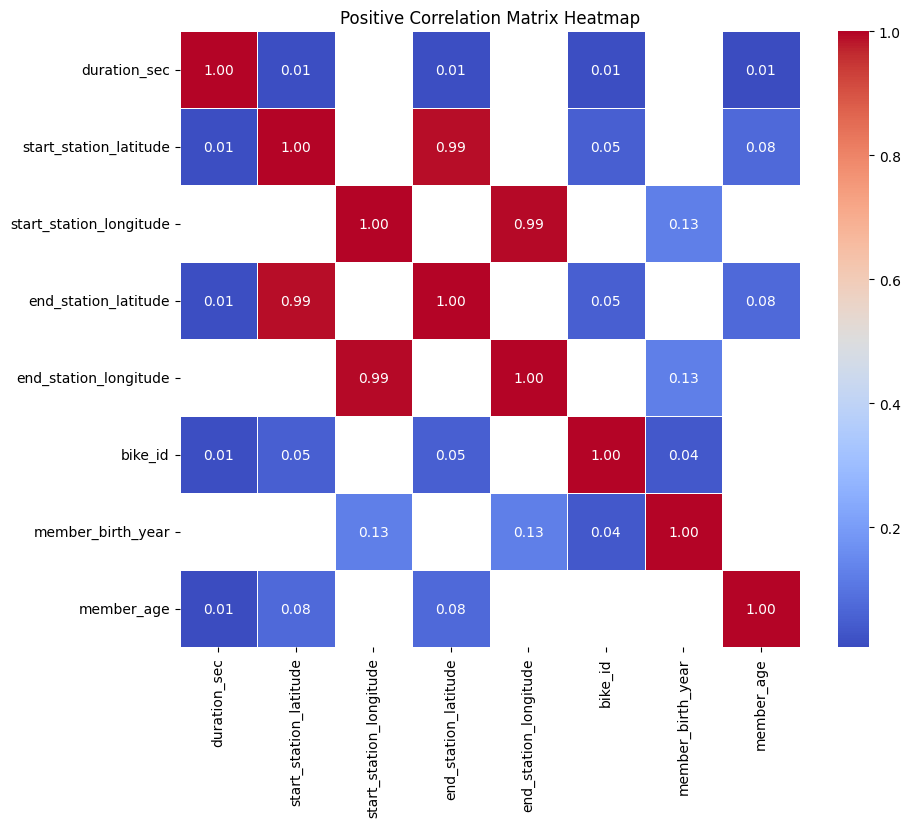

In [11]:
# Calculate members' age from birth year
Bikedata_cleaned['member_age'] = 2024 - Bikedata_cleaned['member_birth_year']

# Select numerical columns for correlation analysis
numerical_columns = ['duration_sec', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude',
                      'end_station_longitude', 'bike_id', 'member_birth_year', 'member_age']

# Calculate correlation matrix
correlation_matrix = Bikedata_cleaned[numerical_columns].corr()

# Select only positive correlations
positive_correlations = correlation_matrix[correlation_matrix > 0]

# Create a heatmap for positive correlations
plt.figure(figsize=(10, 8))
sns.heatmap(positive_correlations, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Positive Correlation Matrix Heatmap')
plt.show()

According to the heatmap above the majority of the variables in this dataset show relationships by looking at the correlation coefficient.

#### Distribution of Rides by User Type

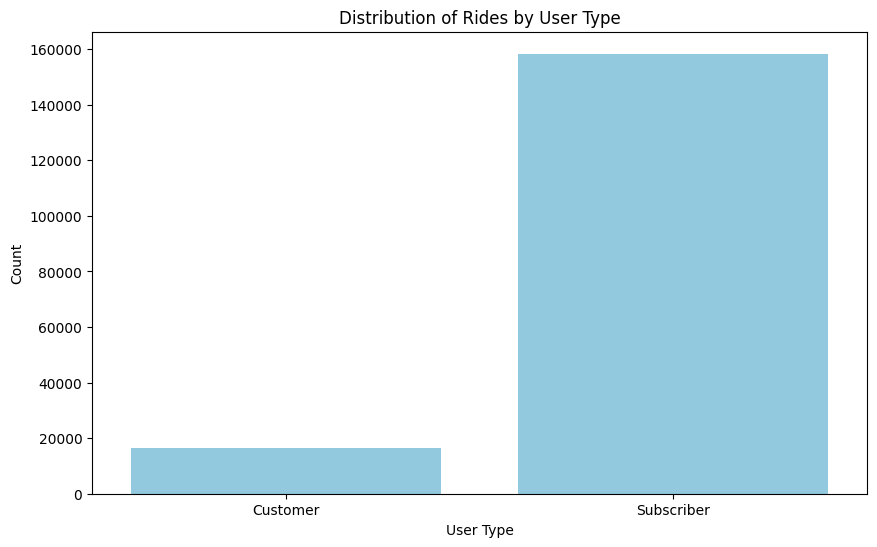

In [12]:
# Create a count plot for user_type with a single color
plt.figure(figsize=(10, 6))
sns.countplot(x='user_type', data=Bikedata_cleaned, color='skyblue')
plt.title('Distribution of Rides by User Type')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()


The majority of rides are attributed to subscribers.

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
